In [1]:
import pyvista as pv
import numpy as np
from scipy.ndimage.interpolation import rotate as SR


In [75]:
box = np.zeros([3,3,3])

box[0,2,2] = 0.2
#box[1,0,0] = 0.2

#box[0, 1, 0] = 0.2
#box[1, 1, 0] = 0.5

box = SR(box, angle=45, axes=(1, 2), reshape=True)

#02 roter xy plan

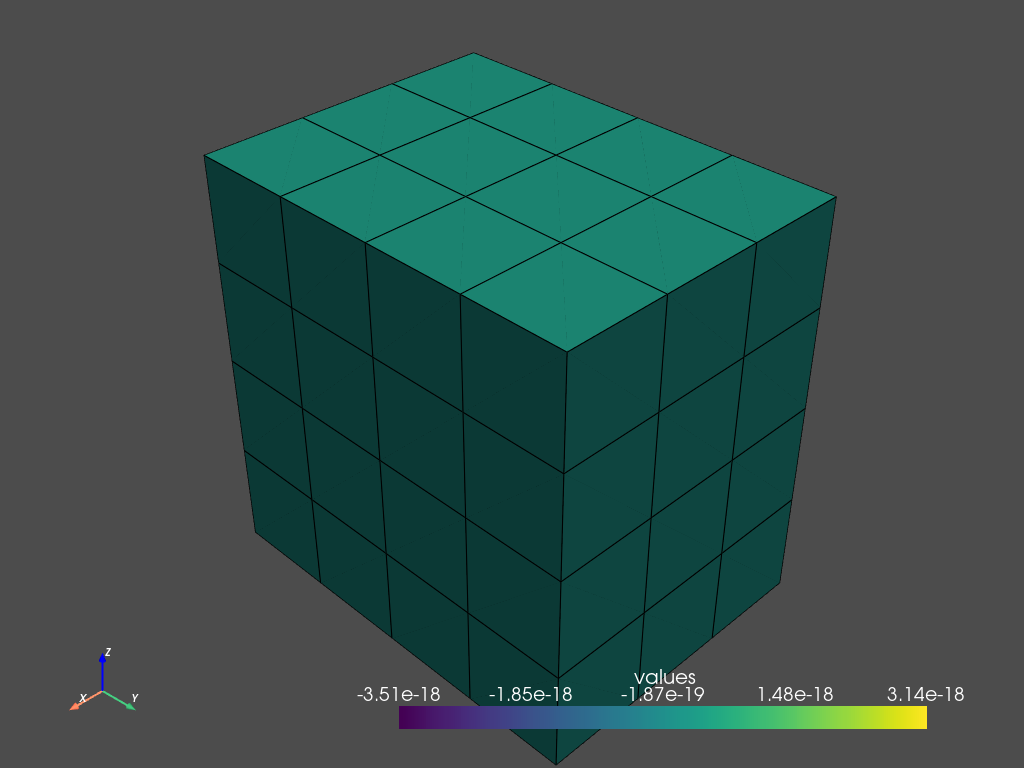

In [76]:
# Create the spatial reference
#https: // docs.pyvista.org/examples/00-load/create-uniform-grid.html#
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(box.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = box.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True, jupyter_backend='static')


In [77]:
plotter = pv.Plotter(window_size=(600, 400))
plotter.background_color = 'w'
plotter.enable_anti_aliasing()
plotter.add_mesh(grid, show_edges=True)
plotter.show(jupyter_backend='pythreejs')


Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…